Застосуйте описані в лекції методи трансформації даних на датасеті Data_to_Transform, що міститься на GitHub в папці лекції. Цей датасет містить чотири колонки, що відповідають:
1. помірно зміщеним вправо даним (Moderate Positive Skew)
2. сильно зміщеним вправо даним (Highly Positive Skew)
3. помірно зміщеним вліво даним (Moderate Negative Skew)
4. сильно зміщеним вліво даним (Highly Negative Skew)
Оцініть результати трансформацій через квантильно-квантильні графіки.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer

In [33]:
df = pd.read_csv('Data_to_Transform.csv')
df.head(10)

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296
5,1.342577,3.018138,10.720679,8.977754
6,1.359727,3.026771,10.718358,8.969744
7,1.404696,3.028970,10.667741,8.962335
8,1.409988,3.045471,10.658861,8.957279
9,1.420835,3.047525,10.643465,8.950892


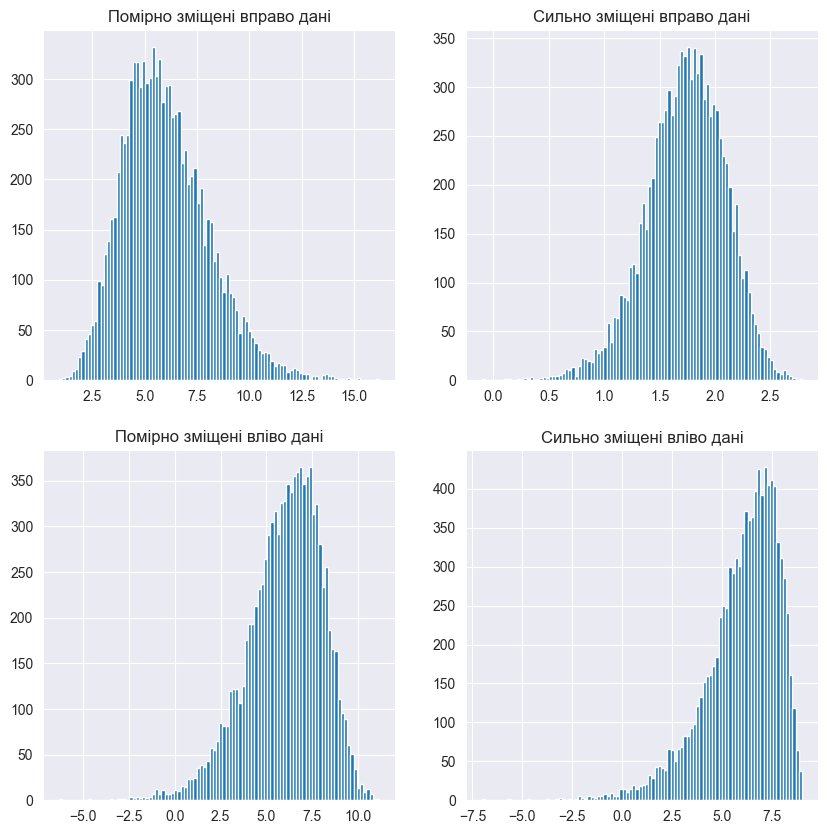

In [67]:
# Розміщення графіків на сітці 2 на 2
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Графік 1 - помірно зміщеним вправо даним
axes[0, 0].hist(df['Moderate Positive Skew'], bins=100)
axes[0, 0].set_title('Помірно зміщені вправо дані')

# Графік 2 - сильно зміщеним вправо даним
axes[0, 1].hist(df['Highly Positive Skew'], bins=100)
axes[0, 1].set_title('Сильно зміщені вправо дані')

# Графік 3 - помірно зміщеним вліво даним
axes[1, 0].hist(df['Moderate Negative Skew'], bins=100)
axes[1, 0].set_title('Помірно зміщені вліво дані')

# Графік 4 - сильно зміщеним вліво даним
axes[1, 1].hist(df['Highly Negative Skew'], bins=100)
axes[1, 1].set_title('Сильно зміщені вліво дані')

plt.show()

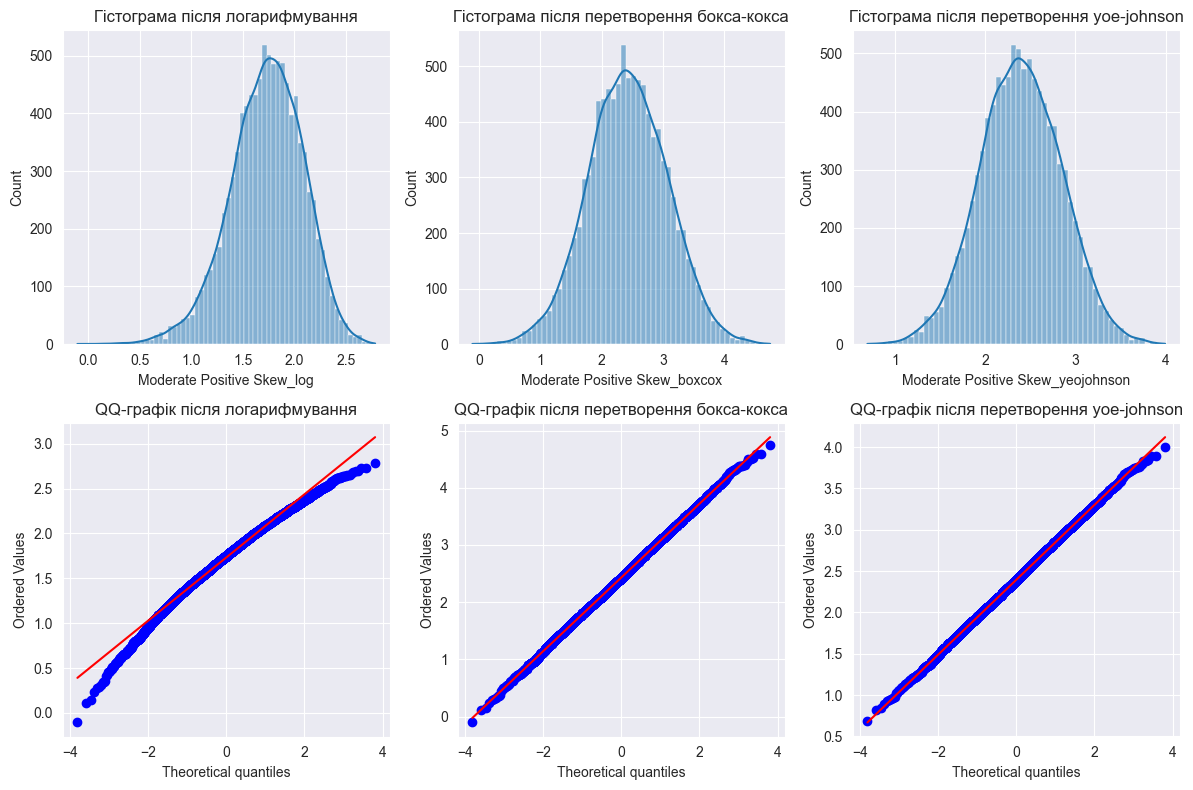

In [65]:
# Створення фігури з сіткою 2x3
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Застосування логарифмування
df['Moderate Positive Skew_log'] = np.log(df['Moderate Positive Skew'])

# Відображення графіка histplot та qqplot після логарифмування
sns.histplot(df['Moderate Positive Skew_log'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Гістограма після логарифмування')
stats.probplot(df['Moderate Positive Skew_log'], plot=axes[1, 0])
axes[1, 0].set_title('QQ-графік після логарифмування')

# Застосування перетворення бокса-кокса
df['Moderate Positive Skew_boxcox'], _ = stats.boxcox(df['Moderate Positive Skew'])

# Відображення графіка histplot та qqplot після перетворення бокса-кокса
sns.histplot(df['Moderate Positive Skew_boxcox'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Гістограма після перетворення бокса-кокса')
stats.probplot(df['Moderate Positive Skew_boxcox'], plot=axes[1, 1])
axes[1, 1].set_title('QQ-графік після перетворення бокса-кокса')

# Застосування перетворення yoe-johnson
df['Moderate Positive Skew_yeojohnson'], _ = stats.yeojohnson(df['Moderate Positive Skew'])

# Відображення графіка histplot та qqplot після перетворення yoe-johnson
sns.histplot(df['Moderate Positive Skew_yeojohnson'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Гістограма після перетворення yoe-johnson')
stats.probplot(df['Moderate Positive Skew_yeojohnson'], plot=axes[1, 2])
axes[1, 2].set_title('QQ-графік після перетворення yoe-johnson')

# Відображення графіків
plt.tight_layout()
plt.show()



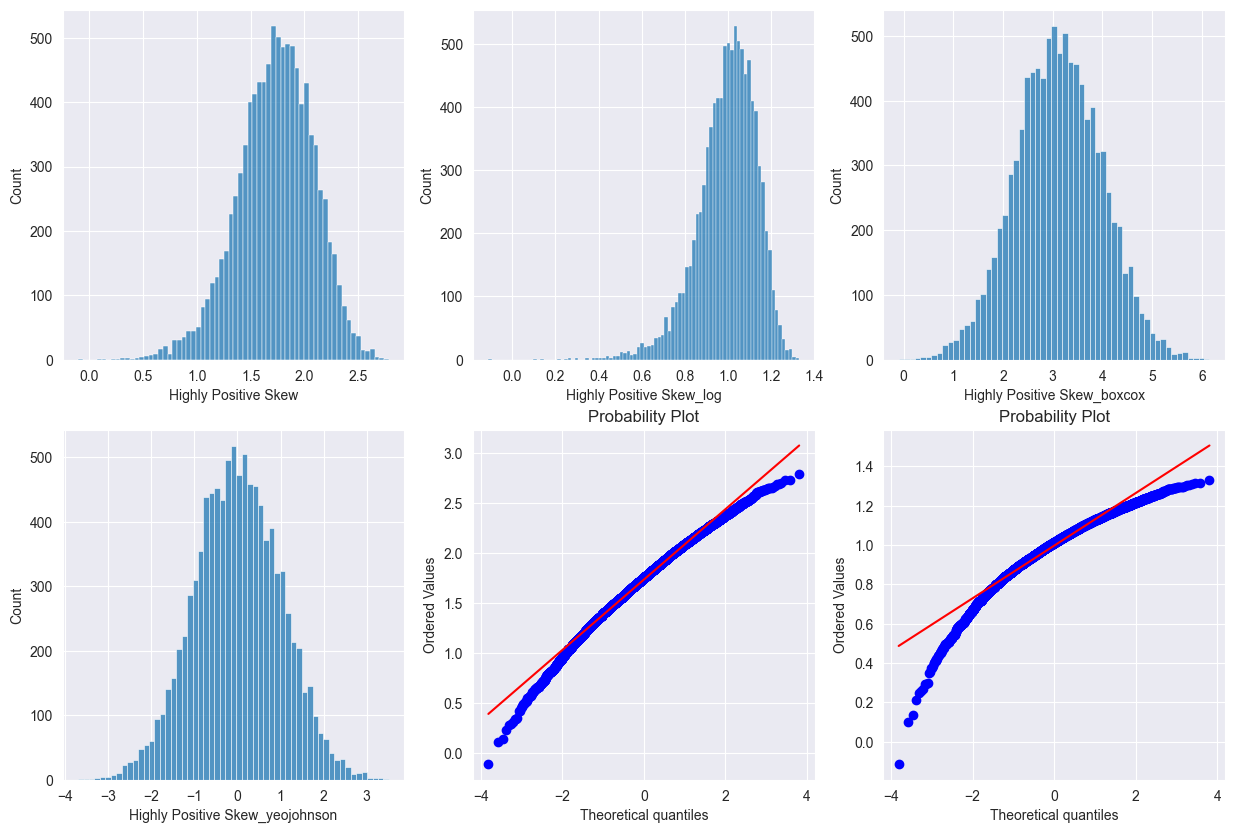

In [72]:
from sklearn.preprocessing import PowerTransformer

# Застосування логарифмування
df['Highly Positive Skew_log'] = np.log(df['Highly Positive Skew'] + 1)

# Застосування перетворення бокса-кокса
df['Highly Positive Skew_boxcox'], _ = stats.boxcox(df['Highly Positive Skew'] + 1)

# Застосування перетворення Йео-Джонсона
pt = PowerTransformer(method='yeo-johnson')
df['Highly Positive Skew_yeojohnson'] = pt.fit_transform(df[['Highly Positive Skew']])

# Виведення даних на графіки
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(df['Highly Positive Skew'], ax=axes[0, 0])
sns.histplot(df['Highly Positive Skew_log'], ax=axes[0, 1])
sns.histplot(df['Highly Positive Skew_boxcox'], ax=axes[0, 2])
sns.histplot(df['Highly Positive Skew_yeojohnson'], ax=axes[1, 0])
stats.probplot(df['Highly Positive Skew'], plot=axes[1, 1])
stats.probplot(df['Highly Positive Skew_log'], plot=axes[1, 2])

plt.show()


C:\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


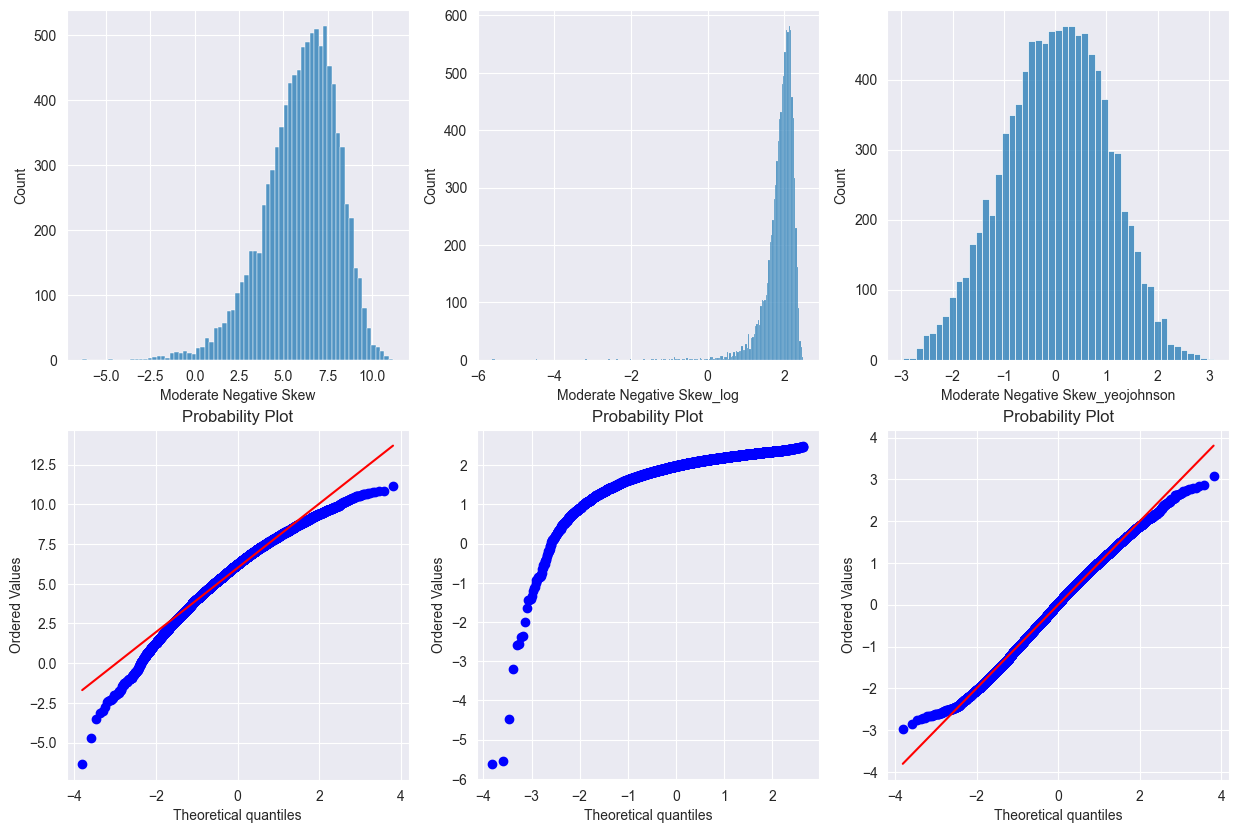

In [64]:
# Застосування логарифмування з додаванням 1 до вихідних даних
df['Moderate Negative Skew_log'] = np.log(df['Moderate Negative Skew'] + 1)

# Застосування перетворення Йео-Джонсона
pt = PowerTransformer(method='yeo-johnson')
df['Moderate Negative Skew_yeojohnson'] = pt.fit_transform(df[['Moderate Negative Skew']])

# Виведення даних на графіки
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(df['Moderate Negative Skew'], ax=axes[0, 0])
sns.histplot(df['Moderate Negative Skew_log'], ax=axes[0, 1])
sns.histplot(df['Moderate Negative Skew_yeojohnson'], ax=axes[0, 2])

stats.probplot(df['Moderate Negative Skew'], plot=axes[1, 0])
stats.probplot(df['Moderate Negative Skew_log'], plot=axes[1, 1])
stats.probplot(df['Moderate Negative Skew_yeojohnson'], plot=axes[1, 2])

plt.show()


C:\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


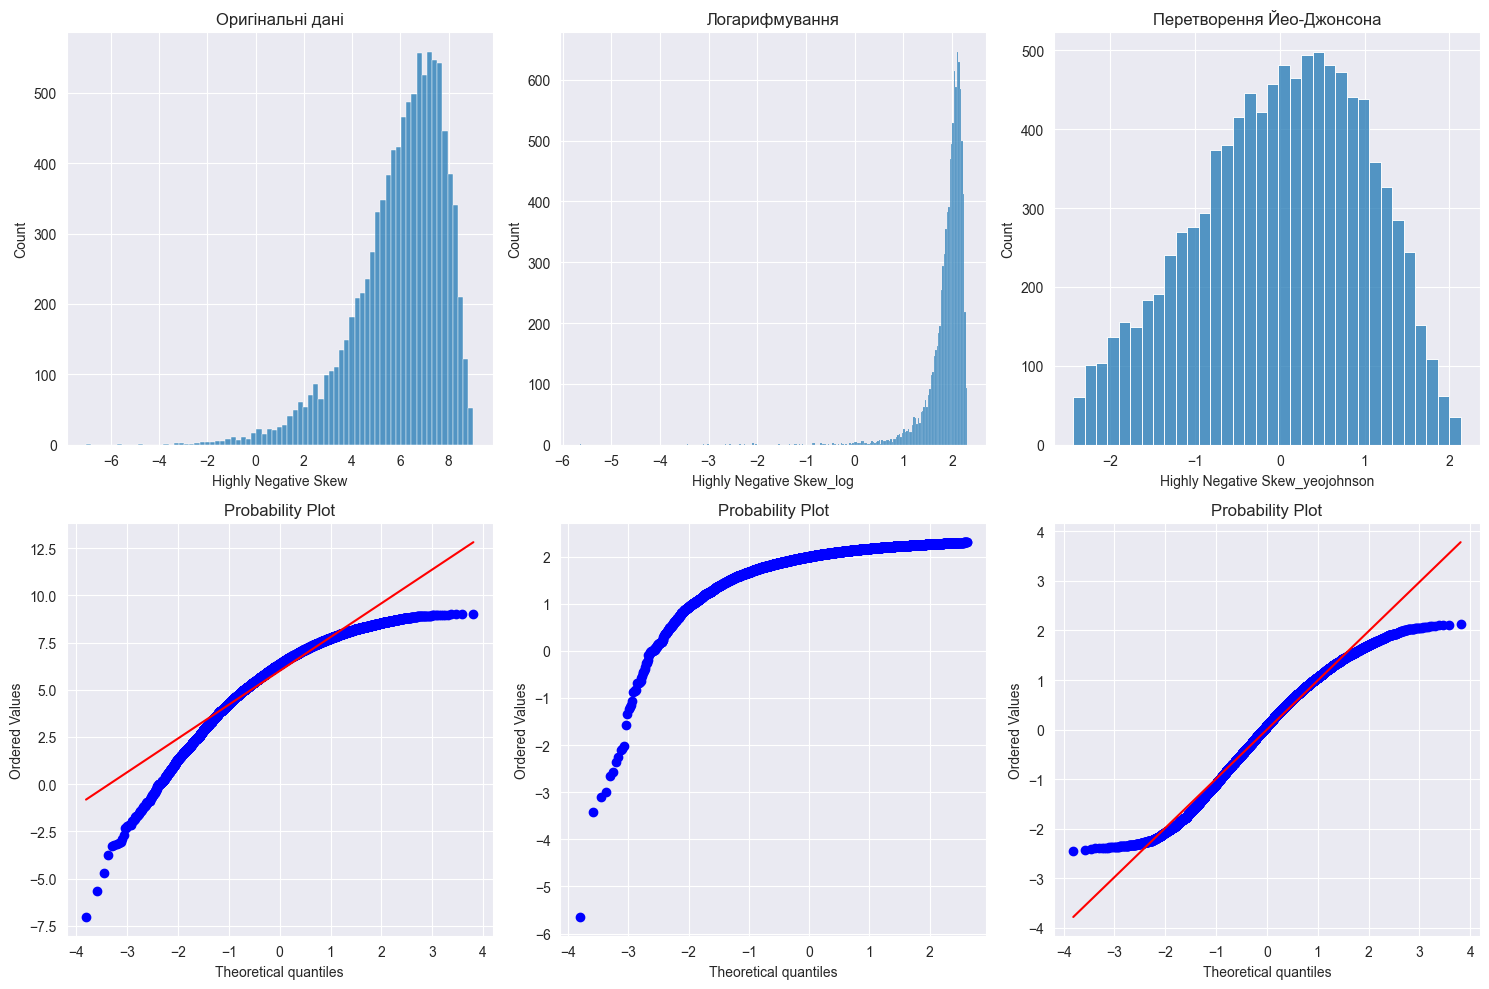

In [70]:
# Застосування логарифмування до колонки "Highly Negative Skew"
df['Highly Negative Skew_log'] = np.log(df['Highly Negative Skew'] + 1)

# Застосування перетворення Йео-Джонсона до колонки "Highly Negative Skew"
pt_yeojohnson = PowerTransformer(method='yeo-johnson')
df['Highly Negative Skew_yeojohnson'] = pt_yeojohnson.fit_transform(df[['Highly Negative Skew']])

# Виведення даних на графіки
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(df['Highly Negative Skew'], ax=axes[0, 0]) # Графік histplot оригінальних даних
sns.histplot(df['Highly Negative Skew_log'], ax=axes[0, 1]) # Графік histplot після логарифмування
sns.histplot(df['Highly Negative Skew_yeojohnson'], ax=axes[0, 2]) # Графік histplot після перетворення Йео-Джонсона

stats.probplot(df['Highly Negative Skew'], plot=axes[1, 0]) # Графік qqplot оригінальних даних
stats.probplot(df['Highly Negative Skew_log'], plot=axes[1, 1]) # Графік qqplot після логарифмування
stats.probplot(df['Highly Negative Skew_yeojohnson'], plot=axes[1, 2]) # Графік qqplot після перетворення Йео-Джонсона

# Налаштування заголовків графіків
axes[0, 0].set_title('Оригінальні дані')
axes[0, 1].set_title('Логарифмування')
axes[0, 2].set_title('Перетворення Йео-Джонсона')

plt.tight_layout() # Налаштування розташування графіків
plt.show() # Виведення графіків на екран
